<a href="https://colab.research.google.com/github/ycchiu18/xiemen1129/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


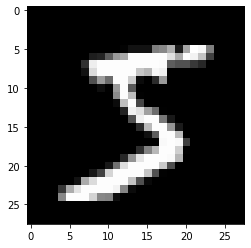

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
idx = 0
pd.DataFrame(x_train[idx])
plt.imshow(pd.DataFrame(x_train[idx]), cmap="gray")
print(y_train[idx])

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias) 
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
    ]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 多個輸出(多元分類): CategoricalCrossEntropy sigma(pilog1/qi)
# 單個輸出(二元分類): BinaryCrossEntropy plog1/q + (1-p)log1/(1-q)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
pd.DataFrame(x_train_norm[0])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


In [8]:
# 一輪: 60000 * 0.9 / 100 -> 540梯度下降
# epochs: 整份資料看幾輪
# verbose: 0(quiet), 1(完整), 2(無進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mnist.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
540/540 - 5s - loss: 0.3584 - accuracy: 0.9013 - val_loss: 0.1657 - val_accuracy: 0.9553 - 5s/epoch - 9ms/step
Epoch 2/100
540/540 - 3s - loss: 0.1722 - accuracy: 0.9503 - val_loss: 0.1261 - val_accuracy: 0.9662 - 3s/epoch - 6ms/step
Epoch 3/100
540/540 - 3s - loss: 0.1216 - accuracy: 0.9644 - val_loss: 0.1033 - val_accuracy: 0.9720 - 3s/epoch - 6ms/step
Epoch 4/100
540/540 - 3s - loss: 0.0945 - accuracy: 0.9728 - val_loss: 0.0926 - val_accuracy: 0.9725 - 3s/epoch - 5ms/step
Epoch 5/100
540/540 - 3s - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0808 - val_accuracy: 0.9767 - 3s/epoch - 6ms/step
Epoch 6/100
540/540 - 3s - loss: 0.0626 - accuracy: 0.9814 - val_loss: 0.0819 - val_accuracy: 0.9760 - 3s/epoch - 6ms/step
Epoch 7/100
540/540 - 3s - loss: 0.0512 - accuracy: 0.9843 - val_loss: 0.0821 - val_accuracy: 0.9767 - 3s/epoch - 6ms/step
Epoch 8/100
540/540 - 3s - loss: 0.0427 - accuracy: 0.9878 - val_loss: 0.0795 - val_accuracy: 0.9770 - 3s/epoch - 5ms/step
Epoch 9/100
540/

In [9]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9772


[0.07667695730924606, 0.9771999716758728]

In [10]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(True)".format(i) for i in range(10)],
      columns=["{}(Pre)".format(i) for i in range(10)])

,0(Pre),1(Pre),2(Pre),3(Pre),4(Pre),5(Pre),6(Pre),7(Pre),8(Pre),9(Pre)
0(True),972,1,1,0,2,0,1,1,1,1
1(True),0,1126,3,1,0,1,2,0,2,0
2(True),4,2,1008,1,1,0,3,7,6,0
3(True),0,0,5,981,1,8,0,5,5,5
4(True),1,0,2,0,962,0,5,1,1,10
5(True),2,0,0,3,1,877,4,2,2,1
6(True),7,2,1,1,3,8,934,0,2,0
7(True),0,5,6,6,1,0,0,1004,1,5
8(True),5,2,2,4,4,9,1,4,941,2
9(True),1,4,0,6,18,5,0,6,2,967


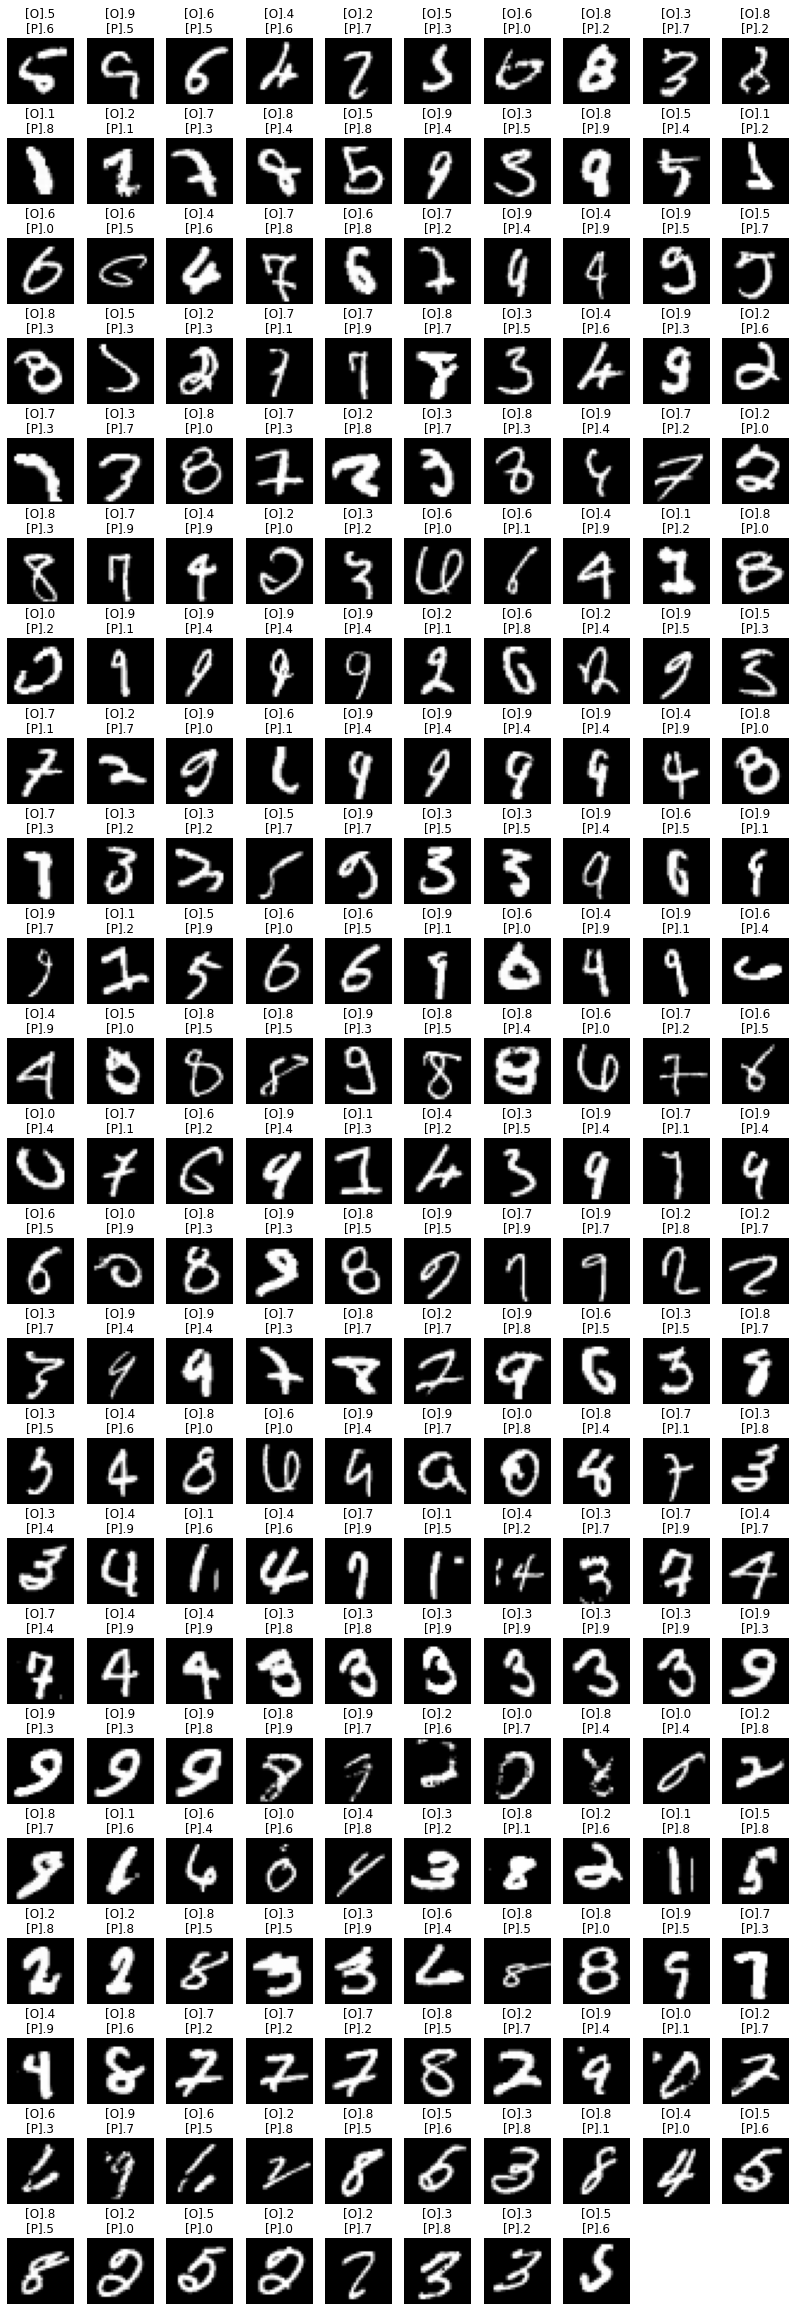

In [24]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.nonzero(y_test != pre)[0]
pre_false_label = y_test[idx]
pre_false_pre = pre[idx]
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
  plt.subplot(height, width, i+1)
  t = "[O].{}\n[P].{}".format(pre_false_label[i], pre_false_pre[i])
  plt.title(t)
  plt.axis("off")
  plt.imshow(pre_false_img[i], cmap="gray")
